# 單元5 迴歸法預測函數

我們認真的來做一下數據分析!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 5-1 小試線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 500 個點

In [2]:
x = np.linspace(0, 6, 500)
y = 1.2*x + 0.8

畫出圖形來。

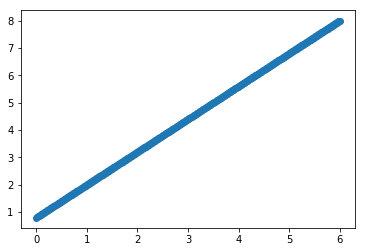

In [3]:
plt.scatter(x, y)

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [6]:
Y = y + 0.5*np.random.randn(500)

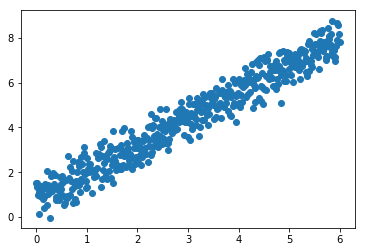

In [7]:
plt.scatter(x, Y)

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn.svm` 裡的 `SVR` 來做各種迴歸。

In [11]:
# x = [5, 8, 2, 9]
# X = [[5], 
#      [8], 
#      [2], 
#      [9]]

In [12]:
x.shape

(500,)

In [13]:
len(x)

500

In [15]:
X = x.reshape(len(x), 1)

In [8]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [17]:
len(x_train)

400

In [18]:
len(x_test)

100

### 【重點】開一台「線性迴歸機」

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regr = LinearRegression()

In [21]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Ypred = regr.predict(x_test)

In [25]:
regr.predict([[1.3]])

array([2.33859591])

In [26]:
regr.predict([[1.3], [5]])

array([2.33859591, 6.79367453])

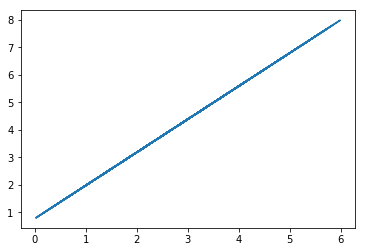

In [29]:
plt.plot(x_test.ravel(), Ypred)

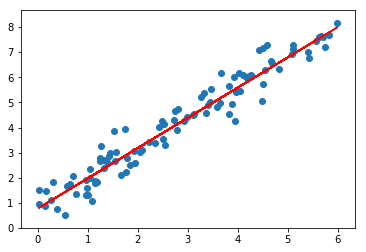

In [31]:
plt.plot(x_test, Ypred, 'r')
plt.scatter(x_test, y_test)

In [33]:
regr.coef_

array([1.2040753])

In [34]:
regr.intercept_

0.7732980117942119

### 【重點】注意輸入格式

## 5-2 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

我們在「訓練」這個函數時只有以下這些資料。

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

#### 用測試資料試試我們預測準不準

## 5-3 股票預測

我們快速的把上次的資料找回來做預測...

#### 訓練資料、測試資料

#### 開台「迴歸機」

#### 預測

這看來有點怪...

#### 直接預測 40 天!

這也差太遠!!

## 5-4 房價預測

#### 讀入資料

SciKit-Learn 有許多 "Toy Datasets" 可以讓我們玩玩。

今天我們要使用的是「波士頓房價資料」。

In [35]:
import seaborn as sns

In [36]:
from sklearn.datasets import load_boston

#### 閱讀數據庫說明

我們可以用

    print(boston.DESCR)
    
來看看說明。也可以用

    boston.feature_names
    
看看 features 的名稱。

In [38]:
boston_dataset = load_boston()

In [39]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
# boston_dataset.data
# boston_dataset.target

In [43]:
boston = pd.DataFrame(boston_dataset.data,
                     columns = boston_dataset.feature_names)

In [44]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
boston["MEDV"] = boston_dataset.target

In [46]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


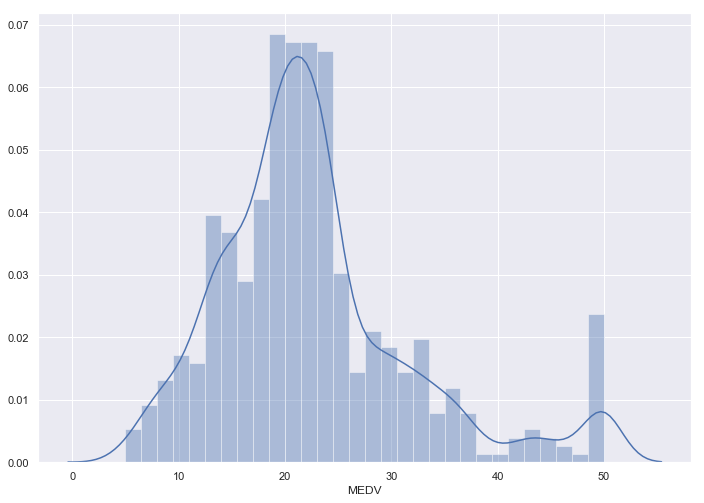

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.MEDV, bins=30)

In [50]:
correlation_matrix = boston.corr().round(2)

In [51]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


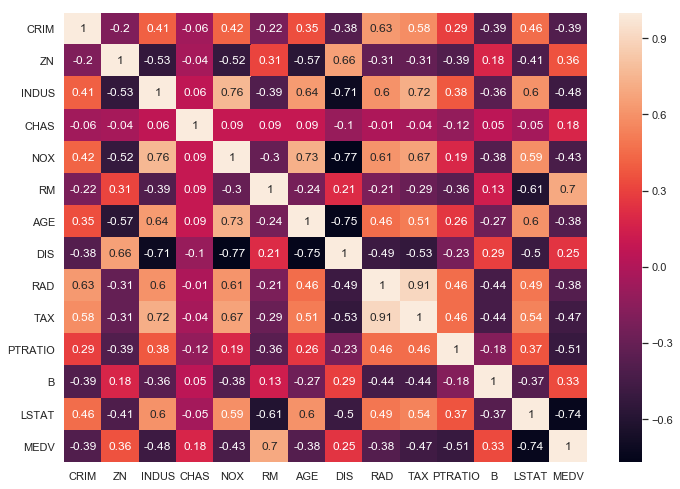

In [52]:
sns.heatmap(correlation_matrix, annot=True)

#### 訓練資料

In [53]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [55]:
regr = LinearRegression()

In [56]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
Ypred = regr.predict(x_test)

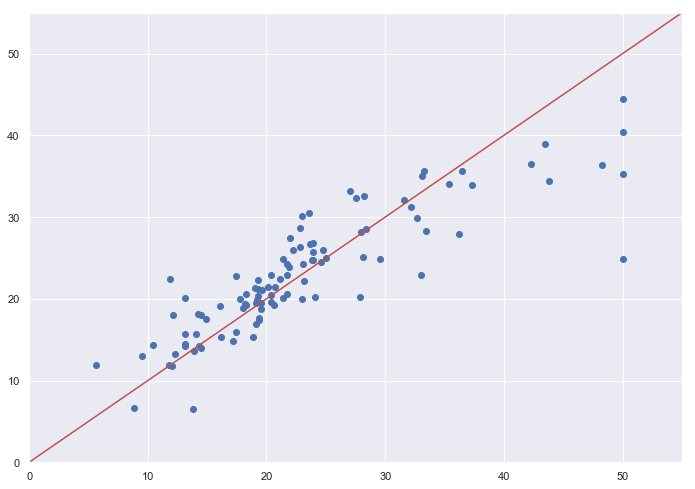

In [59]:
plt.scatter(y_test, Ypred)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55], [0, 55], 'r')

#### 區分訓練資料、測試資料

#### 開個分類機、訓練

#### 預測、看結果